In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [2]:
df = pd.read_csv('../Datasets/Spotify Data.csv')

In [3]:
df.head()

,artist_all,artist_base,rank,song,year,artist_featured,song_clean,artist_clean,lyrics,acousticness,...,speechiness,tempo,time_signature,valence,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio
0,percy faith,percy faith,1,theme from a summer place,1960,NaN,theme from a summer place,percy faith,theres a summer place where it may rain or sto...,0.631,...,0.0253,92.631,4.0,0.749,2.414883,104.0,0.717771,58.0,1960,1.793103
1,jim reeves,jim reeves,2,he'll have to go,1960,NaN,hell have to go,jim reeves,put your sweet lips a little closer to the pho...,0.909,...,0.0379,81.181,3.0,0.200,2.310667,152.0,1.096365,69.0,1960,2.202899
2,the everly brothers,the everly brothers,3,cathy's clown,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.412,...,0.0339,119.809,4.0,0.866,2.400217,121.0,0.840202,64.0,1960,1.890625
3,johnny preston,johnny preston,4,running bear,1960,NaN,running bear,johnny preston,on the bank of the river stood running bear yo...,0.854,...,0.0530,119.987,4.0,0.822,2.636667,220.0,1.390645,89.0,1960,2.471910
4,mark dinning,mark dinning,5,teen angel,1960,NaN,teen angel,mark dinning,teen angel teen angel teen angel that fateful ...,0.936,...,0.0459,101.517,4.0,0.282,2.664883,109.0,0.681706,73.0,1960,1.493151


In [4]:
df.iloc[1]

artist_all                                                 jim reeves
artist_base                                                jim reeves
rank                                                                2
song                                                 he'll have to go
year                                                             1960
artist_featured                                                   NaN
song_clean                                            hell have to go
artist_clean                                               jim reeves
lyrics              put your sweet lips a little closer to the pho...
acousticness                                                    0.909
danceability                                                    0.554
energy                                                          0.186
explicit                                                          0.0
instrumentalness                                              0.00144
key                 

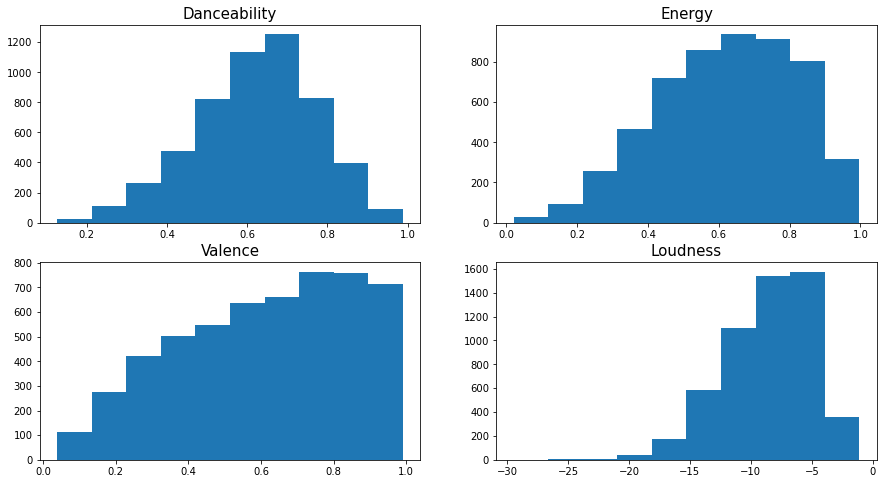

In [5]:
fig,axes = plt.subplots(2,2,figsize=(15,8))

axes[0,0].hist(df['danceability'])
axes[0,0].set_title('Danceability',fontsize=15)
axes[0,1].hist(df['energy'])
axes[0,1].set_title('Energy',fontsize=15)
axes[1,0].hist(df['valence'])
axes[1,0].set_title('Valence',fontsize=15)
axes[1,1].hist(df['loudness'])
axes[1,1].set_title('Loudness',fontsize=15)
plt.show()

In [6]:
df[['valence','loudness','danceability','energy']].describe()

,valence,loudness,danceability,energy
count,5396.000000,5396.000000,5396.000000,5396.000000
mean,0.612340,-8.546783,0.621631,0.620164
std,0.239058,3.550926,0.150753,0.193300
min,0.037900,-29.467000,0.126000,0.020400
25%,0.425000,-10.878500,0.526000,0.480000
50%,0.637000,-8.017000,0.634000,0.635000
75%,0.815000,-5.796250,0.727000,0.774000
max,0.991000,-1.097000,0.988000,0.997000


In [7]:
df.columns

Index(['artist_all', 'artist_base', 'rank', 'song', 'year', 'artist_featured',
       'song_clean', 'artist_clean', 'lyrics', 'acousticness', 'danceability',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'release_date', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_min', 'num_words',
       'words_per_sec', 'num_uniq_words', 'decade', 'uniq_ratio'],
      dtype='object')

In [8]:
cols = ['danceability','energy','loudness','valence','acousticness','instrumentalness','tempo']
X = pd.DataFrame(MinMaxScaler().fit_transform(df[cols]))
X.columns = cols
X.fillna(0,inplace=True)

In [9]:
kmeans = KMeans(init="k-means++",n_clusters=2,random_state=15).fit(X)

In [10]:
df['kmeans'] = kmeans.labels_

Text(0.5, 0.92, '3D Scatter Plot of Songs Clustered')

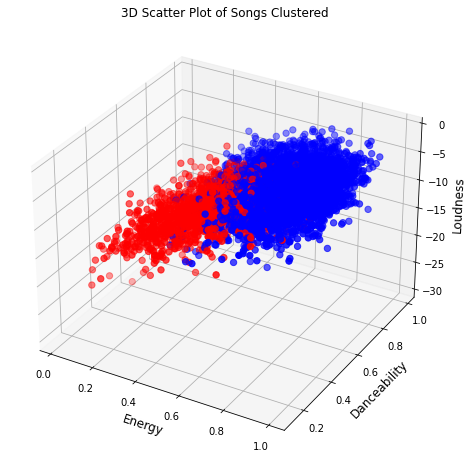

In [11]:
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111,projection='3d')

x = df['energy']
y = df['danceability']
z = df['loudness']
cmhot = cmhot = plt.get_cmap('bwr')

ax.scatter(x,y,z,c=df['kmeans'],s=40,cmap=cmhot)
ax.set_xlabel('Energy',fontsize=12)
ax.set_ylabel('Danceability',fontsize=12)
ax.set_zlabel('Loudness',fontsize=12)
ax.set_title("3D Scatter Plot of Songs Clustered")

In [12]:
df.columns

Index(['artist_all', 'artist_base', 'rank', 'song', 'year', 'artist_featured',
       'song_clean', 'artist_clean', 'lyrics', 'acousticness', 'danceability',
       'energy', 'explicit', 'instrumentalness', 'key', 'liveness', 'loudness',
       'mode', 'popularity', 'release_date', 'speechiness', 'tempo',
       'time_signature', 'valence', 'duration_min', 'num_words',
       'words_per_sec', 'num_uniq_words', 'decade', 'uniq_ratio', 'kmeans'],
      dtype='object')

In [13]:
cols.append('kmeans')
df[cols].groupby(['kmeans']).mean()

,danceability,energy,loudness,valence,acousticness,instrumentalness,tempo
kmeans,,,,,,,
0,0.660138,0.696945,-7.580093,0.684158,0.163141,0.024165,120.802750
1,0.510866,0.399309,-11.327404,0.405761,0.569330,0.034497,115.189042


In [14]:
np.unique(df['kmeans'],return_counts=True)

(array([0, 1]), array([4004, 1562], dtype=int64))

In [15]:
df[df['kmeans']==0]

,artist_all,artist_base,rank,song,year,artist_featured,song_clean,artist_clean,lyrics,acousticness,...,tempo,time_signature,valence,duration_min,num_words,words_per_sec,num_uniq_words,decade,uniq_ratio,kmeans
2,the everly brothers,the everly brothers,3,cathy's clown,1960,NaN,cathys clown,the everly brothers,dont want your love any more dont want your k...,0.41200,...,119.809,4.0,0.866,2.400217,121.0,0.840202,64.0,1960,1.890625,0
7,jimmy jones,jimmy jones,8,handy man,1960,NaN,handy man,jimmy jones,hey girls gather round listen to what im putti...,0.40800,...,144.758,4.0,0.870,2.086000,119.0,0.950783,65.0,1960,1.830769,0
8,elvis presley,elvis presley,9,stuck on you,1960,NaN,stuck on you,elvis presley,you can shake an apple off an apple tree shak...,0.75800,...,131.641,4.0,0.955,2.327333,149.0,1.067030,79.0,1960,1.886076,0
9,chubby checker,chubby checker,10,the twist,1960,NaN,the twist,chubby checker,come on baby lets do the twist come on baby l...,0.19900,...,156.405,4.0,0.953,2.562667,144.0,0.936524,48.0,1960,3.000000,0
11,bobby rydell,bobby rydell,12,wild one,1960,NaN,wild one,bobby rydell,oh wild one im a gonna tame you down you littl...,0.70900,...,148.507,4.0,0.890,2.351550,156.0,1.105654,46.0,1960,3.391304,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5561,camila cabello featuring young thug,camila cabello,96,havana,2017,young thug,havana,camila cabello,hey half of my heart is in havana ooh na na h...,0.18400,...,104.988,4.0,0.394,3.621783,350.0,1.610625,102.0,2010,3.431373,0
5562,maroon 5 featuring sza,maroon 5,97,what lovers do,2017,sza,what lovers do,maroon 5,say say say hey hey now baby oh mama dont pla...,0.08050,...,109.959,4.0,0.420,3.330817,366.0,1.831383,75.0,2010,4.880000,0
5563,blackbear,blackbear,98,do re mi,2017,NaN,do re mi,blackbear,do re mi fa so yeah yeah yeah oh do re mi fa ...,0.00419,...,110.977,3.0,0.154,3.533783,382.0,1.801657,122.0,2010,3.131148,0
5564,xxxtentacion,xxxtentacion,99,look at me!,2017,NaN,look at me,xxxtentacion,ayy im like bitch who is your mans ayy cant k...,0.25900,...,139.059,4.0,0.349,2.105767,337.0,2.667279,106.0,2010,3.179245,0


In [16]:
df[cols].to_csv('../Datasets/Spotify Data Labeled.csv')